In [1]:
import numpy as np
import pandas as pd

# Library untuk visualisasi data
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler, StandardScaler, LabelEncoder, OneHotEncoder, OrdinalEncoder

# for resampling 
from imblearn.over_sampling import RandomOverSampler

#for MODEL
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier

#for checking testing results
from sklearn.metrics import accuracy_score, f1_score, recall_score, precision_score, classification_report, confusion_matrix

In [2]:
datacovid = "COVID-19 Cases.csv"
data = pd.read_csv(datacovid)
data

,Case_Type,Cases,Difference,Date,Country_Region,Province_State,Admin2,Combined_Key,FIPS,Lat,Long,Table_Names,Prep_Flow_Runtime
0,Confirmed,319,1,4/11/2020,Mauritius,NaN,NaN,NaN,NaN,-20.200000,57.500000,Time Series,4/13/2020 9:18:41 PM
1,Deaths,0,0,2/27/2020,Bahamas,NaN,NaN,NaN,NaN,25.034300,-77.396300,Time Series,4/13/2020 9:18:41 PM
2,Confirmed,16,0,2/16/2020,Germany,NaN,NaN,NaN,NaN,51.000000,9.000000,Time Series,4/13/2020 9:18:41 PM
3,Deaths,0,0,1/31/2020,Canada,Alberta,NaN,NaN,NaN,53.933300,-116.576500,Time Series,4/13/2020 9:18:41 PM
4,Deaths,0,0,3/4/2020,Australia,Queensland,NaN,NaN,NaN,-28.016700,153.400000,Time Series,4/13/2020 9:18:41 PM
...,...,...,...,...,...,...,...,...,...,...,...,...,...
582655,Deaths,0,0,1/22/2020,US,Mississippi,Hancock,"Hancock, Mississippi, US",28045.0,30.418302,-89.488510,Time Series,4/13/2020 9:18:41 PM
582656,Confirmed,0,0,1/22/2020,US,Alabama,Etowah,"Etowah, Alabama, US",1055.0,34.045673,-86.040519,Time Series,4/13/2020 9:18:41 PM
582657,Confirmed,0,0,1/22/2020,US,Tennessee,Montgomery,"Montgomery, Tennessee, US",47125.0,36.496094,-87.385507,Time Series,4/13/2020 9:18:41 PM
582658,Deaths,0,0,1/22/2020,US,Louisiana,Lincoln,"Lincoln, Louisiana, US",22061.0,32.600315,-92.665974,Time Series,4/13/2020 9:18:41 PM


In [3]:
# Memeriksa missing/null value
data.isnull().sum()

Case_Type                0
Cases                    0
Difference               0
Date                     0
Country_Region           0
Province_State       29880
Admin2               43824
Combined_Key         42994
FIPS                 60258
Lat                    166
Long                   166
Table_Names              0
Prep_Flow_Runtime        0
dtype: int64

In [4]:
# Memeriksa info dalam dataset
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 582660 entries, 0 to 582659
Data columns (total 13 columns):
 #   Column             Non-Null Count   Dtype  
---  ------             --------------   -----  
 0   Case_Type          582660 non-null  object 
 1   Cases              582660 non-null  int64  
 2   Difference         582660 non-null  int64  
 3   Date               582660 non-null  object 
 4   Country_Region     582660 non-null  object 
 5   Province_State     552780 non-null  object 
 6   Admin2             538836 non-null  object 
 7   Combined_Key       539666 non-null  object 
 8   FIPS               522402 non-null  float64
 9   Lat                582494 non-null  float64
 10  Long               582494 non-null  float64
 11  Table_Names        582660 non-null  object 
 12  Prep_Flow_Runtime  582660 non-null  object 
dtypes: float64(3), int64(2), object(8)
memory usage: 57.8+ MB


In [5]:
data.columns

Index(['Case_Type', 'Cases', 'Difference', 'Date', 'Country_Region',
       'Province_State', 'Admin2', 'Combined_Key', 'FIPS', 'Lat', 'Long',
       'Table_Names', 'Prep_Flow_Runtime'],
      dtype='object')

In [6]:
# Drop kolom-kolom yang tidak digunakan (Feature Selection)
to_drop = ['Date','Province_State','Admin2','Combined_Key','FIPS','Table_Names', 'Prep_Flow_Runtime','Lat','Long']
data.drop(to_drop, inplace=True, axis=1)

In [7]:
data.isnull().sum()

Case_Type         0
Cases             0
Difference        0
Country_Region    0
dtype: int64

In [8]:
data

,Case_Type,Cases,Difference,Country_Region
0,Confirmed,319,1,Mauritius
1,Deaths,0,0,Bahamas
2,Confirmed,16,0,Germany
3,Deaths,0,0,Canada
4,Deaths,0,0,Australia
...,...,...,...,...
582655,Deaths,0,0,US
582656,Confirmed,0,0,US
582657,Confirmed,0,0,US
582658,Deaths,0,0,US


In [9]:
# Rows containing duplicate data
data.duplicated().any()

True

In [10]:
# Mengatasi data duplikat dengan removing

# Print the number of rows before removing duplicates
print("Number of rows before removing duplicates:", len(data))

# Drop duplicates
data.drop_duplicates(inplace=True)

# Print the number of rows after removing duplicates
print("Number of rows after removing duplicates:", len(data))

# Simpan dataframe ke dalam file CSV
data.to_csv('COVID 19 Cases.csv', index=False)

Number of rows before removing duplicates: 582660
Number of rows after removing duplicates: 19317


In [11]:
data

,Case_Type,Cases,Difference,Country_Region
0,Confirmed,319,1,Mauritius
1,Deaths,0,0,Bahamas
2,Confirmed,16,0,Germany
3,Deaths,0,0,Canada
4,Deaths,0,0,Australia
...,...,...,...,...
581259,Confirmed,231,21,US
581312,Confirmed,637,49,US
581333,Confirmed,244,6,US
581527,Confirmed,247,16,US


In [12]:
# Periksa kembali data duplikat
data.duplicated().any()

False

In [13]:
data.Case_Type.value_counts()

Confirmed    15385
Deaths        3932
Name: Case_Type, dtype: int64

In [14]:
# Encode Kolom Target
encoder = LabelEncoder()
data['Case_Type'] = encoder.fit_transform(data['Case_Type'])
data['Country_Region']=encoder.fit_transform(data['Country_Region'])
data

,Case_Type,Cases,Difference,Country_Region
0,0,319,1,109
1,1,0,0,11
2,0,16,0,65
3,1,0,0,32
4,1,0,0,8
...,...,...,...,...
581259,0,231,21,170
581312,0,637,49,170
581333,0,244,6,170
581527,0,247,16,170


In [15]:
# Jumlah kemunculan setiap nilai yang ada di dalam kolom 'Case_Type'.
data['Case_Type'].value_counts()

0    15385
1     3932
Name: Case_Type, dtype: int64

In [16]:
# Normalisasi data menggunakan StandardScaler
scaler = StandardScaler()
col=['Cases','Difference']
scaled_ds=scaler.fit_transform(data[col])

Elbow Method to determine the number of clusters to be formed:


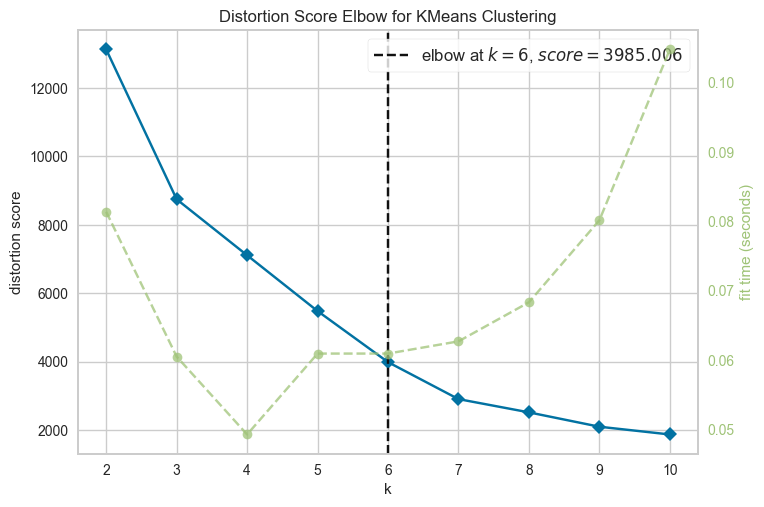

<AxesSubplot: title={'center': 'Distortion Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='distortion score'>

In [19]:
# Analisis clustering dengan data yang telah dinormalisasi

# Mengabaikan pesan peringatan yang muncul selama program dijalankan
import warnings
warnings.filterwarnings('ignore')
# Import beberapa algoritma clustering
from sklearn.cluster import KMeans, DBSCAN, AgglomerativeClustering, SpectralClustering
from yellowbrick.cluster import KElbowVisualizer
print('Elbow Method to determine the number of clusters to be formed:')
# Analisis Elbow Method pada data yang telah dinormalisasi
Elbow_M = KElbowVisualizer(KMeans(), k=10) # KElbowVisualizer adalah alat visualisasi yang membantu dalam memilih jumlah klaster yang optimal untuk set data, # Algoritma clustering yang digunakan untuk analisis Elbow Method
# melakukan pemanggilan metode 'fit' pada objek Elbow_M dengan memberikan parameter data yang telah dinormalisasi.
Elbow_M.fit(scaled_ds)
# Menampilkan hasil analisis Elbow Method dalam bentuk visualisasi
Elbow_M.show()

In [20]:
# Implementasi dari algoritma KMeans clustering pada data yang telah dinormalisasi dengan menggunakan StandardScaler.
kmeans = KMeans(n_clusters=5)
label = kmeans.fit_predict(scaled_ds)

In [21]:
data['Cluster']=label

In [22]:
data.Cluster.value_counts()

0    18657
3      455
2       84
4       69
1       52
Name: Cluster, dtype: int64

In [23]:
data

,Case_Type,Cases,Difference,Country_Region,Cluster
0,0,319,1,109,0
1,1,0,0,11,0
2,0,16,0,65,0
3,1,0,0,32,0
4,1,0,0,8,0
...,...,...,...,...,...
581259,0,231,21,170,0
581312,0,637,49,170,0
581333,0,244,6,170,0
581527,0,247,16,170,0


In [24]:
data.columns

Index(['Case_Type', 'Cases', 'Difference', 'Country_Region', 'Cluster'], dtype='object')

In [25]:
data['Cluster'].value_counts()

0    18657
3      455
2       84
4       69
1       52
Name: Cluster, dtype: int64

In [26]:
from sklearn.model_selection import train_test_split
X = data[['Case_Type', 'Cases', 'Difference', 'Country_Region']]
y = data['Cluster']
# for resampling 
from imblearn.over_sampling import RandomOverSampler
oversample = RandomOverSampler(sampling_strategy='auto')

X_ros, y_ros = oversample.fit_resample(X, y)

In [27]:
y_ros.value_counts()

0    18657
3    18657
4    18657
2    18657
1    18657
Name: Cluster, dtype: int64

In [28]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test= train_test_split(X_ros,y_ros, test_size=0.2, random_state=42)

In [29]:
from sklearn.preprocessing import StandardScaler
# Memilih kolom numerik
columns = ['Cases','Difference']

# Membuat objek scaler
sc = StandardScaler()

# Melakukan z-score pada dataset
sc_Xtrain= sc.fit_transform(X_train[columns])
sc_Xtest=sc.fit_transform(X_test[columns])

In [30]:
X_train[columns]=sc_Xtrain
X_test[columns]=sc_Xtest

In [31]:
rf = RandomForestClassifier()
rf.fit(X_train, y_train)

RandomForestClassifier()

In [32]:
rf_pred = rf.predict(X_test)
rf_pred

array([4, 2, 1, ..., 4, 3, 3])

In [34]:
accuracy_score(y_test, rf_pred)

0.9950152757678083

In [35]:
import pickle

In [36]:
filename = 'rf_call.pkl'
pickle.dump(rf, open(filename, 'wb'))

In [37]:
filename = 'sc_call.pkl'
pickle.dump(sc, open(filename, 'wb'))